In [1]:
## Import packages

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

pd.set_option('display.max_columns', 500)

%matplotlib inline

# Analyzing responsibility data from first studies from summer term 2019


In [2]:
# read file into pd dataframe

data = pd.read_csv(r'responsibility_data_sampled.csv', sep=";")
print(data.shape)
data.head()

(349, 44)


,OID,file_origin,Design,Level,Design_coded,Level_coded,TRUST,DOMINANCE,RHTRUST,Resp_Bic,Resp_Car,Resp_Driver,Resp_Producer,Sex,Age,Car_Owner,km_year,Education,Income,MC_autonom,MC_babyface,MC_baseline,MC_aggressive,MC_wide,Trust_1,Trust_2,Trust_3,RH_Trust_1,RH_Trust_2,RH_Trust_3,RH_Trust_4,RH_Trust_5,RH_Trust_6,RH_Trust_7,RH_Trust_8,RH_Trust_9,Dominance_1,Dominance_2,Dominance_3,Quality_1,Quality_2,Quality_3,Quality_4,Quality_5
0,1,Resp_Aggr_LP,1,1,aggressive,level 5,333.333.333.333.333,466.666.666.666.667,533.333.333.333.333,7,1,3,1,female,24,2,400,5,1,11,2,3,6,4,3,4,3,6,3,4,6,6,6,6,5,6,4,5,5,7,4,6,6,1
1,2,Resp_Aggr_LP,1,0,aggressive,level 3,5,4,522.222.222.222.222,2,4,7,5,female,29,2,2000,5,1,6,1,4,1,3,5,5,5,5,5,5,5,6,4,6,6,5,4,1,7,6,2,7,7,1
2,4,Resp_Aggr_LP,1,1,aggressive,level 5,666.666.666.666.667,433.333.333.333.333,666.666.666.666.667,5,3,6,4,male,19,2,5000,5,1,8,3,2,3,3,7,7,6,7,7,7,7,7,5,7,6,7,5,3,5,7,6,7,6,1
3,5,Resp_Aggr_LP,0,0,baseline,level 3,466.666.666.666.667,333.333.333.333.333,411.111.111.111.111,6,4,6,6,male,50,1,40000,5,0,10,3,6,2,3,4,5,5,5,4,4,4,4,4,4,4,4,2,2,6,6,2,6,6,1
4,6,Resp_Aggr_LP,0,0,baseline,level 3,233.333.333.333.333,466.666.666.666.667,488.888.888.888.889,1,1,7,4,male,21,2,300,5,1,6,5,6,5,5,1,5,1,5,5,6,7,4,1,5,5,6,3,4,7,5,4,7,6,1


In [3]:
print(data['Design'].value_counts().sort_index())
print(data['Level'].value_counts().sort_index())

0    96
1    90
2    79
3    84
Name: Design, dtype: int64
0    180
1    169
Name: Level, dtype: int64


In [4]:
# Delete "Wide"-condition

#annotation Design:
#0 = baseline
#1 = aggressive
#2 = babyfaced
#3 = wide

data = data[data['Design'] < 3]
data.shape

(265, 44)

In [5]:
data.columns

Index(['OID', 'file_origin', 'Design', 'Level', 'Design_coded', 'Level_coded',
       'TRUST', 'DOMINANCE', 'RHTRUST', 'Resp_Bic', 'Resp_Car', 'Resp_Driver',
       'Resp_Producer', 'Sex', 'Age', 'Car_Owner', 'km_year', 'Education',
       'Income', 'MC_autonom', 'MC_babyface', 'MC_baseline', 'MC_aggressive',
       'MC_wide', 'Trust_1', 'Trust_2', 'Trust_3', 'RH_Trust_1', 'RH_Trust_2',
       'RH_Trust_3', 'RH_Trust_4', 'RH_Trust_5', 'RH_Trust_6', 'RH_Trust_7',
       'RH_Trust_8', 'RH_Trust_9', 'Dominance_1', 'Dominance_2', 'Dominance_3',
       'Quality_1', 'Quality_2', 'Quality_3', 'Quality_4', 'Quality_5'],
      dtype='object')

In [6]:
# function for displaying eta_squared as measure of effect size in ANOVA

def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

In [7]:
# Two-factorial ANOVA with Design and Level as Factors and Resp_Bic, Resp_Car, Resp_Driver, Resp_Producer as Outcomes



for resp in ['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']:

    formula = '{} ~ C(Level) + C(Design) + C(Level):C(Design)'.format(resp)
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    eta_squared(aov_table)
    print('ANOVA on {}'.format(resp)+'\n',aov_table.round(4))
    print('\n')

ANOVA on Resp_Bic
                       sum_sq     df       F  PR(>F)  eta_sq
C(Level)              0.3522    1.0  0.1351  0.7135  0.0005
C(Design)            36.9327    2.0  7.0803  0.0010  0.0516
C(Level):C(Design)    2.9699    2.0  0.5694  0.5666  0.0041
Residual            675.5045  259.0     NaN     NaN     NaN


ANOVA on Resp_Car
                       sum_sq     df        F  PR(>F)  eta_sq
C(Level)             73.3199    1.0  25.9064  0.0000  0.0837
C(Design)            30.1282    2.0   5.3227  0.0054  0.0344
C(Level):C(Design)   39.4793    2.0   6.9747  0.0011  0.0451
Residual            733.0181  259.0      NaN     NaN     NaN


ANOVA on Resp_Driver
                       sum_sq     df        F  PR(>F)  eta_sq
C(Level)            228.1990    1.0  77.0822  0.0000  0.2054
C(Design)            70.1700    2.0  11.8512  0.0000  0.0632
C(Level):C(Design)   46.0212    2.0   7.7726  0.0005  0.0414
Residual            766.7604  259.0      NaN     NaN     NaN


ANOVA on Resp_Producer
 

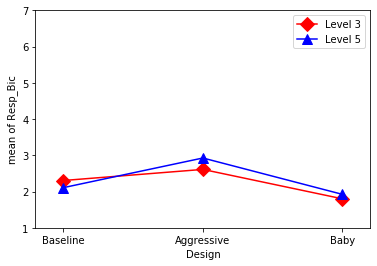

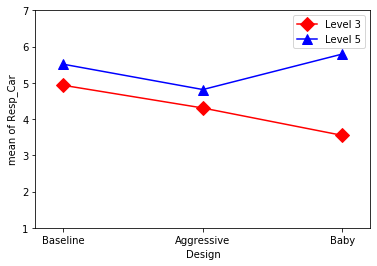

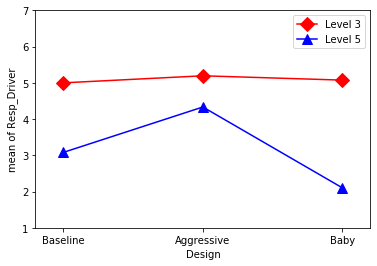

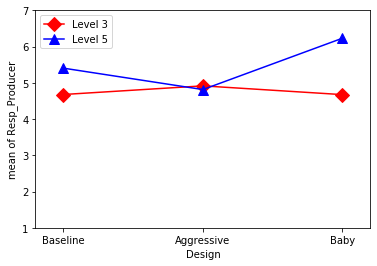

In [8]:
# Visualizing factorial data with statsmodel interaction_plot

for resp in ['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']:

    fig = interaction_plot(data['Design'], data['Level'], data[resp],
                       colors=['red','blue'], markers=['D','^'], ms=10)

    plt.xticks([0,1,2], labels=['Baseline', 'Aggressive', 'Baby'])
    plt.ylim(1,7)
    plt.legend(['Level 3', 'Level 5'])
    plt.show()


In [9]:
#Post-hoc testing of mean differences for different levels of automation

# display mean values and std. deviations by level and design

means_by_cond = pd.pivot_table(data, 
                               values=['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer'], 
                               index=['Level', 'Design'], aggfunc=[np.mean, np.std])
means_by_cond

mean                                           std  \
              Resp_Bic  Resp_Car Resp_Driver Resp_Producer  Resp_Bic   
Level Design                                                           
0     0       2.305085  4.932203    5.000000      4.677966  1.694354   
      1       2.611111  4.305556    5.194444      4.916667  1.678056   
      2       1.800000  3.550000    5.075000      4.675000  1.604481   
1     0       2.108108  5.513514    3.081081      5.405405  1.307750   
      1       2.925926  4.814815    4.333333      4.814815  1.702959   
      2       1.923077  5.794872    2.102564      6.230769  1.579217   

                                                  
              Resp_Car Resp_Driver Resp_Producer  
Level Design                                      
0     0       1.720710    1.473911      1.467354  
      1       2.011672    1.753681      1.841971  
      2       1.153590    1.491643      1.542351  
1     0       1.574477    1.934746      1.739404  
      1       1.972204    2.009412      1.853849  
      2       1.379922    1.602545      1.346761

In [10]:
#Levene's test vor variance equality

W, p = stats.levene(data[(data['Level']==0) & (data['Design']==0)]['Resp_Bic'], data[(data['Level']==0) & (data['Design']==1)]['Resp_Bic'])

print('Levene test statistic: {}, p = {}'.format(W, p))


Levene test statistic: 0.17358043213787364, p = 0.6779092066506753


In [11]:
#t-test

t, p = stats.ttest_ind(data[(data['Level']==0) & (data['Design']==0)]['Resp_Bic'], data[(data['Level']==0) & (data['Design']==1)]['Resp_Bic'])
print('t-value = {}, p = {}'.format(t, p))

t-value = -0.8571175223825969, p = 0.3935832632918522


In [12]:
#For each automation level and outcome, display t-tests of mean differences depending on design

#Anotation design:
#0 = baseline
#1 = aggressive
#2 = babyfaced

#Annotation automation level:
#0 = Level 3
#1 = Level 5

for resp in ['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']:
    for level in sorted(data['Level'].unique()):
        print('\nT-tests for {} on automation level {}'.format(resp, level))
        values = data[data['Level']==level][['Design', resp]]
        for design in sorted(data['Design'].unique()):
            if design == 2:
                one = 0
                two = 2
            else:
                one = design
                two = design+1
            
            if stats.levene(values[values['Design']==one][resp], values[values['Design']==two][resp])[1] < .05:
                t, p = stats.ttest_ind(values[values['Design']==one][resp], values[values['Design']==two][resp], equal_var=False)
            else:
                t, p = stats.ttest_ind(values[values['Design']==one][resp], values[values['Design']==two][resp])
            print('Comparing means of {} and {}: t-value = {}, p = {}'.format(one, two, round(t,4), round(p,4)))


T-tests for Resp_Bic on automation level 0
Comparing means of 0 and 1: t-value = -0.8571, p = 0.3936
Comparing means of 1 and 2: t-value = 2.1532, p = 0.0346
Comparing means of 0 and 2: t-value = 1.4866, p = 0.1404

T-tests for Resp_Bic on automation level 1
Comparing means of 0 and 1: t-value = -2.5871, p = 0.0113
Comparing means of 1 and 2: t-value = 2.888, p = 0.0048
Comparing means of 0 and 2: t-value = 0.5547, p = 0.5808

T-tests for Resp_Car on automation level 0
Comparing means of 0 and 1: t-value = 1.6142, p = 0.1099
Comparing means of 1 and 2: t-value = 1.9795, p = 0.0528
Comparing means of 0 and 2: t-value = 4.4446, p = 0.0

T-tests for Resp_Car on automation level 1
Comparing means of 0 and 1: t-value = 1.7971, p = 0.0757
Comparing means of 1 and 2: t-value = -2.8192, p = 0.0059
Comparing means of 0 and 2: t-value = -0.8296, p = 0.4094

T-tests for Resp_Driver on automation level 0
Comparing means of 0 and 1: t-value = -0.5561, p = 0.58
Comparing means of 1 and 2: t-value =

# Analyzing design pretest

In [13]:
pretest = pd.read_csv('pretest.csv', sep=";")

pretest.head()

,child,ordi,aggre,domi,wide,narrow,relia,trust,age,sex,grad,owner,interest,type,no
0,1.0,6,2,2.0,3,3,5.0,6.0,23,0,0.0,0,4,1,14
1,5.0,7,3,4.0,5,2,2.0,2.0,25,1,1.0,1,2,1,1
2,3.0,3,4,5.0,5,1,7.0,5.0,22,0,0.0,0,4,2,14
3,3.0,6,3,3.0,3,3,5.0,4.0,21,1,0.0,0,4,3,14
4,2.0,5,3,3.0,3,5,4.0,4.0,26,1,1.0,0,4,2,1


In [14]:
pretest.shape

(135, 15)

In [15]:
#Annotation design
#1 = baseline
#2 = wide
#3 = aggressive
#4 = childish
#5 = aggressive2


In [16]:
#delete wide condition

pretest = pretest[pretest['type'] != 2]
pretest.shape

(108, 15)

In [17]:
#Visualize mean values by condition
pretest.columns

Index(['child', 'ordi', 'aggre', 'domi', 'wide', 'narrow', 'relia', 'trust',
       'age', 'sex', 'grad', 'owner', 'interest', 'type', 'no'],
      dtype='object')

In [18]:
means_by_cond = pd.pivot_table(pretest, values=['child', 'ordi', 'aggre'], index=['type'])

means_by_cond = means_by_cond.reset_index()
means_by_cond

,type,aggre,child,ordi
0,1,2.518519,2.814815,4.629630
1,3,3.074074,2.888889,3.851852
2,4,1.518519,4.222222,3.074074
3,5,3.481481,2.538462,3.888889


In [19]:
means = means_by_cond[['aggre', 'child', 'ordi']].T
means

,0,1,2,3
aggre,2.518519,3.074074,1.518519,3.481481
child,2.814815,2.888889,4.222222,2.538462
ordi,4.629630,3.851852,3.074074,3.888889


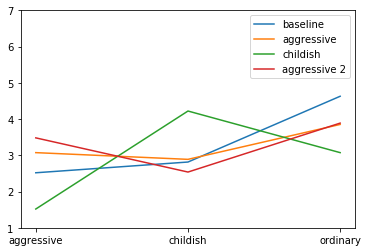

In [20]:
plt.plot(means[0])
plt.plot(means[1])
plt.plot(means[2])
plt.plot(means[3])

plt.legend(['baseline', 'aggressive', 'childish', 'aggressive 2'])
plt.xticks([0,1,2], labels=['aggressive', 'childish', 'ordinary'])
plt.ylim(1,7)

plt.show()

In [21]:
# t-tests for evaluating mean differences on perceptions

#Annotation type
#1 = baseline
#3 = aggressive
#4 = childish
#5 = aggressive2

design = {1:'baseline', 3:'aggressive', 4:'childish', 5:'aggressive 2'}

for perception in ['ordi', 'child', 'aggre']: 
    print('T-tests for {}'.format(perception)+'\n')
    for i in [3,4,5]:
        t, p = stats.ttest_ind(pretest[pretest['type']==1][perception], pretest[pretest['type']==i][perception], nan_policy='omit')
        print('Mean difference between baseline and {}: t = {}, p = {}'.format(design[i], t, p)+'\n\n')
    

T-tests for ordi

Mean difference between baseline and aggressive: t = 1.852817889523018, p = 0.06958725159986436


Mean difference between baseline and childish: t = 3.927041422953478, p = 0.0002544372463183222


Mean difference between baseline and aggressive 2: t = 1.7844672401846167, p = 0.08018223508460963


T-tests for child

Mean difference between baseline and aggressive: t = -0.180108790857026, p = 0.8577672258519458


Mean difference between baseline and childish: t = -3.5119469462795507, p = 0.0009291342693225183


Mean difference between baseline and aggressive 2: t = 0.6653512781265521, p = 0.5088238259070088


T-tests for aggre

Mean difference between baseline and aggressive: t = -1.3082534956552148, p = 0.1965408378946408


Mean difference between baseline and childish: t = 2.971909493767028, p = 0.00447432442754741


Mean difference between baseline and aggressive 2: t = -2.0203332399313667, p = 0.048513597564308335




# Analyzing responsibility data from winter term 2019/2020

## Data from 

In [105]:
data = pd.read_csv(r'2019-11-07_Hildebrand.csv', sep=";")
print(data.shape)
data.head()

(157, 87)


,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,c_0001,Studienteilnahme,Trust_Car_1,Trust_Car_2,Trust_Car_3,car_check,Manip_Check_1,Manip_Check_2,Manip_Check_3,car_comp1,car_comp2,car_comp3,car_comp4,car_comp5,car_consc1,car_consc2,car_consc3,car_consc4,car_consc5,car_consc6,driv_comp1,driv_comp2,driv_comp3,driv_comp4,driv_comp5,driv_consc1,driv_consc2,driv_consc3,driv_consc4,Resp_Bic,Resp_Car,Resp_Driver,Resp_Producer,Sex,Age,Car_Owner,km_year,Education,Occupation,Occupation_Sonst,Income,Quality_1,Quality_2,Quality_3,Quality_4,Quality_5,Quality_6,ext_host,ip_addr,browser,referer,device_type,participant_browser,participant_browser_version,participant_os,participant_device,participant_brand,participant_model,participant_isbot,participant_continent,participant_country,participant_region,participant_city,participant_latitude,participant_longitude,quota,quota_assignment,page_history,hflip,vflip,output_mode,javascript,flash,session_id,language,cleaned,ats,datetime,date_of_last_access,date_of_first_mail
0,19,0,0,31,3878440,-77,1349,1,1,2,3,5,9,6,7,3,7,7,6,6,6,7,7,6,7,4,4,7,7,7,7,7,6,6,6,6,4,4,4,6,1,25,1,300,5,7,-99,1,7,1,7,7,1,7,-99,-99,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15) ...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878437,387843...",1,1,0,-77,-77,02cbd320b7bc4ae302f2023c59d8568b,1,0,1571666104,2019-10-21 13:55:04,2019-10-21 14:17:33,0000-00-00 00:00:00
1,20,0,0,31,3878440,-77,313,5,1,3,2,4,9,5,2,2,5,4,4,6,6,6,5,3,5,6,5,4,5,4,6,4,5,6,4,4,2,5,3,6,2,24,2,3000,5,7,-99,1,6,2,7,5,1,7,-99,-99,Mozilla/5.0 (Linux; Android 7.1.1; SM-J510FN) ...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878437,387843...",1,0,0,-77,-77,4fa76bfa326ad0959a35c42e24ea9868,1,0,1571666548,2019-10-21 14:02:28,2019-10-21 14:07:41,0000-00-00 00:00:00
2,34,0,0,31,3878440,-77,490,2,1,1,2,6,3,7,5,1,2,2,3,2,4,4,4,4,4,4,4,1,2,2,2,2,4,5,6,5,1,3,7,2,1,27,2,15000,5,7,-99,1,5,2,7,7,1,7,-99,-99,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_2 like...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878436,387843...",0,0,0,-77,-77,6ffc04c53315dab2eec67dd81fed8813,1,0,1571668222,2019-10-21 14:30:22,2019-10-21 14:38:32,0000-00-00 00:00:00
3,39,0,0,31,3878440,-77,1038,4,1,4,4,4,10,4,5,3,5,4,3,4,3,1,1,1,1,1,1,4,4,4,3,4,4,5,4,4,5,4,5,4,2,25,1,18000,5,7,-99,1,4,1,7,7,1,7,-99,-99,Mozilla/5.0 (Linux; Android 8.0.0; RNE-L21) Ap...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878437,387843...",1,1,0,-77,-77,1d592b69c88664ecb52b22cd35cbdd2b,1,0,1571669406,2019-10-21 14:50:06,2019-10-21 15:07:24,0000-00-00 00:00:00
4,43,0,0,31,3878440,-77,345,1,1,3,7,6,5,6,5,1,7,6,6,6,6,2,3,3,4,3,3,6,5,5,6,6,3,5,2,2,2,7,6,7,2,22,1,20000,5,1,-99,1,2,6,6,7,1,7,-99,-99,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14) ...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878437,387843...",0,1,0,-77,-77,75c855a9f4d5b9c198ae5bedf34baff7,1,0,1571669892,2019-10-21 14:58:12,2019-10-21 15:03:57,0000-00-00 00:00:00


In [106]:
data.columns

Index(['lfdn', 'external_lfdn', 'tester', 'dispcode', 'lastpage', 'quality',
       'duration', 'c_0001', 'Studienteilnahme', 'Trust_Car_1', 'Trust_Car_2',
       'Trust_Car_3', 'car_check', 'Manip_Check_1', 'Manip_Check_2',
       'Manip_Check_3', 'car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5', 'car_consc1', 'car_consc2', 'car_consc3', 'car_consc4',
       'car_consc5', 'car_consc6', 'driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5', 'driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4', 'Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer',
       'Sex', 'Age', 'Car_Owner', 'km_year', 'Education', 'Occupation',
       'Occupation_Sonst', 'Income', 'Quality_1', 'Quality_2', 'Quality_3',
       'Quality_4', 'Quality_5', 'Quality_6', 'ext_host', 'ip_addr', 'browser',
       'referer', 'device_type', 'participant_browser',
       'participant_browser_version', 'participant_os', 'participant_device',
       'participant_brand'

In [144]:
# Cases per experimental condition
data['c_0001'].value_counts().sort_index()

1    24
2    29
3    25
4    22
5    27
6    29
Name: c_0001, dtype: int64

In [107]:
# Drop unnecessary columns
data = data.drop(columns=['external_lfdn', 'tester', 'dispcode', 'lastpage', 'quality',
                         'Studienteilnahme', 'ext_host', 'ip_addr', 'browser',
       'referer', 'device_type', 'participant_browser',
       'participant_browser_version', 'participant_os', 'participant_device',
       'participant_brand', 'participant_model', 'participant_isbot',
       'participant_continent', 'participant_country', 'participant_region',
       'participant_city', 'participant_latitude', 'participant_longitude',
       'quota', 'quota_assignment', 'page_history', 'hflip', 'vflip',
       'output_mode', 'javascript', 'flash', 'session_id', 'language',
       'cleaned', 'ats', 'date_of_first_mail'])
data.columns

Index(['lfdn', 'duration', 'c_0001', 'Trust_Car_1', 'Trust_Car_2',
       'Trust_Car_3', 'car_check', 'Manip_Check_1', 'Manip_Check_2',
       'Manip_Check_3', 'car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5', 'car_consc1', 'car_consc2', 'car_consc3', 'car_consc4',
       'car_consc5', 'car_consc6', 'driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5', 'driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4', 'Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer',
       'Sex', 'Age', 'Car_Owner', 'km_year', 'Education', 'Occupation',
       'Occupation_Sonst', 'Income', 'Quality_1', 'Quality_2', 'Quality_3',
       'Quality_4', 'Quality_5', 'Quality_6', 'datetime',
       'date_of_last_access'],
      dtype='object')

In [108]:
# Compute experimental factor variables

# Labels of c_0001
# 1 = 'Level 3, Baseline'
# 2 = 'Level 3, Baby'
# 3 = 'Level 3, Aggressive'
# 4 = 'Level 5, Baseline'
# 5 = 'Level 5, Baby'
# 6 = 'Level 5, Aggressive'

# Creat dictionaries
level_dictionary ={1 : 'Level 3', 2 : 'Level 3', 3 : 'Level 3', 
                   4 : 'Level 5', 5 : 'Level 5', 6 : 'Level 5'}
design_dictionary = {1 : 'Baseline', 2 : 'Baby', 3 : 'Aggressive', 
                     4 : 'Baseline', 5 : 'Baby', 6 : 'Aggressive'}
  
# Add a new columns
data['level'] = data['c_0001'].map(level_dictionary).astype('category') 
data['design'] = data['c_0001'].map(design_dictionary)

data['design'] = pd.Categorical(data['design'], ordered = False, categories = ['Baseline', 'Aggressive', 'Baby']) 

# Check
data[['c_0001', 'level', 'design']].head()

,c_0001,level,design
0,1,Level 3,Baseline
1,5,Level 5,Baby
2,2,Level 3,Baby
3,4,Level 5,Baseline
4,1,Level 3,Baseline


In [109]:
dict(enumerate(data['design'].cat.categories))

{0: 'Baseline', 1: 'Aggressive', 2: 'Baby'}

### Check manipulation variables

In [110]:
# Rename manipulationchecks Manip_Check_1 	Manip_Check_2 	Manip_Check_3 	
data = data.rename(columns={"Manip_Check_1": "childish", "Manip_Check_2": "ordinary", "Manip_Check_3":"aggressive"})

print(data[['car_check', 'childish', 'ordinary', 'aggressive']].describe()) #check min and max
print('\nMissing values\n',data[['car_check', 'childish', 'ordinary', 'aggressive']].isna().sum()) #check for missing values

        car_check    childish    ordinary  aggressive
count  157.000000  157.000000  157.000000  157.000000
mean     7.917197    3.337580    4.267516    2.363057
std      2.655333    2.200099    1.854939    1.725201
min      1.000000    1.000000    1.000000    1.000000
25%      7.000000    1.000000    3.000000    1.000000
50%      9.000000    3.000000    5.000000    2.000000
75%     10.000000    6.000000    6.000000    3.000000
max     11.000000    7.000000    7.000000    7.000000

Missing values
 car_check     0
childish      0
ordinary      0
aggressive    0
dtype: int64


In [111]:
# Manipulation check automation level

if stats.levene(data[data['level']=='Level 3']['car_check'], data[data['level']=='Level 5']['car_check'])[1] < .05: #check for variance equality
    t, p = stats.ttest_ind(data[data['level']=='Level 3']['car_check'], data[data['level']=='Level 5']['car_check'], equal_var=False) #t-test with Welch-correction
else:
    t, p = stats.ttest_ind(data[data['level']=='Level 3']['car_check'], data[data['level']=='Level 5']['car_check']) #t-test withouth Welch-correction

print('Comparing means of car_check between {} and {}: t-value = {}, p = {}'.format('Level 3', 'Level 5', round(t,4), round(p,4)))
print('Mean car_check for Level 3:', round(data[data['level']=='Level 3']['car_check'].mean(),3))
print('Mean car_check for Level 5:', round(data[data['level']=='Level 5']['car_check'].mean(),3))

Comparing means of car_check between Level 3 and Level 5: t-value = -3.1826, p = 0.0018
Mean car_check for Level 3: 7.266
Mean car_check for Level 5: 8.577


In [112]:
# Average design evaluations for differnt design types

means_by_cond = pd.pivot_table(data, values=['childish', 'ordinary', 'aggressive'], index=['design'])

means_by_cond

,aggressive,childish,ordinary
design,,,
Baseline,2.127660,2.425532,5.255319
Aggressive,3.518519,2.074074,3.888889
Baby,1.446429,5.321429,3.803571


In [113]:
design_means = means_by_cond.T
design_means

design,Baseline,Aggressive,Baby
aggressive,2.127660,3.518519,1.446429
childish,2.425532,2.074074,5.321429
ordinary,5.255319,3.888889,3.803571


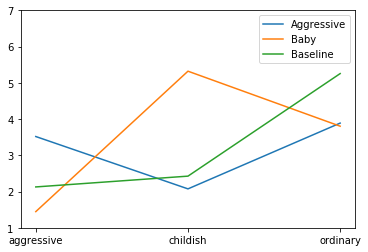

In [114]:
plt.plot(design_means['Aggressive'])
plt.plot(design_means['Baby'])
plt.plot(design_means['Baseline'])

plt.legend(['Aggressive', 'Baby', 'Baseline'])
plt.xticks([0,1,2], labels=['aggressive', 'childish', 'ordinary'])
plt.ylim(1,7)

plt.show()

In [115]:
# T-tests for manipulation check
design = {0:'Baby', 1:'Aggressive'}
for perception in ['ordinary', 'childish', 'aggressive']: 
    print('T-tests for {}'.format(perception)+'\n')
    for i in design:
        t, p = stats.ttest_ind(data[data['design']=='Baseline'][perception], data[data['design']==design[i]][perception], nan_policy='omit')
        print('Mean difference between Baseline and {}: t = {}, p = {}'.format(design[i], round(t,3), round(p,3)),'\n')

T-tests for ordinary

Mean difference between Baseline and Baby: t = 4.558, p = 0.0 

Mean difference between Baseline and Aggressive: t = 3.808, p = 0.0 

T-tests for childish

Mean difference between Baseline and Baby: t = -8.36, p = 0.0 

Mean difference between Baseline and Aggressive: t = 1.179, p = 0.241 

T-tests for aggressive

Mean difference between Baseline and Baby: t = 3.172, p = 0.002 

Mean difference between Baseline and Aggressive: t = -4.083, p = 0.0 



## Two-factorial ANOVAS for responsibility attribution 

In [116]:
#check relevant variables

print(data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']].describe()) #check min and max
print('\nMissing values\n',data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']].isna().sum()) #check for missing values

         Resp_Bic    Resp_Car  Resp_Driver  Resp_Producer
count  157.000000  157.000000   157.000000     157.000000
mean     2.324841    4.656051     4.573248       4.847134
std      1.573892    1.876690     2.136988       1.984445
min      1.000000    1.000000     1.000000       1.000000
25%      1.000000    4.000000     3.000000       4.000000
50%      2.000000    5.000000     5.000000       5.000000
75%      4.000000    6.000000     7.000000       6.000000
max      7.000000    7.000000     7.000000       7.000000

Missing values
 Resp_Bic         0
Resp_Car         0
Resp_Driver      0
Resp_Producer    0
dtype: int64


In [117]:
# Two-factorial ANOVAS

for resp in ['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']:

    formula = '{} ~ C(level) + C(design) + C(level):C(design)'.format(resp)
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    eta_squared(aov_table)
    print('ANOVA on {}'.format(resp)+'\n',aov_table.round(4))
    print('\n')

ANOVA on Resp_Bic
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)              0.7511    1.0  0.2992  0.5852  0.0019
C(design)             5.7901    2.0  1.1533  0.3184  0.0150
C(level):C(design)    1.0411    2.0  0.2074  0.8130  0.0027
Residual            379.0481  151.0     NaN     NaN     NaN


ANOVA on Resp_Car
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)             16.6711    1.0  4.9125  0.0282  0.0304
C(design)             3.5134    2.0  0.5176  0.5970  0.0064
C(level):C(design)   16.4852    2.0  2.4289  0.0916  0.0300
Residual            512.4317  151.0     NaN     NaN     NaN


ANOVA on Resp_Driver
                       sum_sq     df        F  PR(>F)  eta_sq
C(level)             80.8201    1.0  19.5553  0.0000  0.1132
C(design)             6.8672    2.0   0.8308  0.4377  0.0096
C(level):C(design)    2.3873    2.0   0.2888  0.7496  0.0033
Residual            624.0676  151.0      NaN     NaN     NaN


ANOVA on Resp_Producer
      

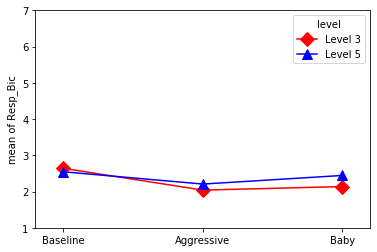

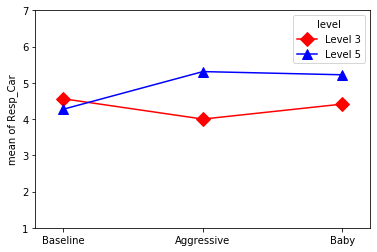

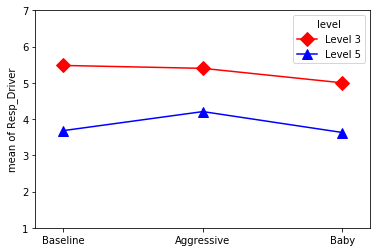

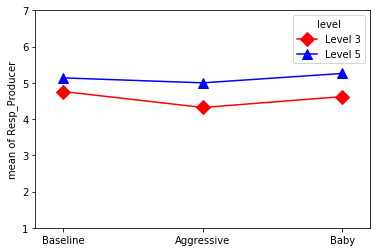

In [118]:
# Visualizing factorial data with statsmodel interaction_plot

for resp in ['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']:

    fig = interaction_plot(x=data['design'].cat.codes, trace=data['level'], response=data[resp], 
                       colors=['red', 'blue'], markers=['D', '^'], ms=10)

    plt.xticks([0,1,2], labels=['Baseline', 'Aggressive', 'Baby'])
    plt.ylim(1,7)
    plt.show()

## Evaluate effect of design on mediators

In [119]:
print(data[['car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5', 'car_consc1', 'car_consc2', 'car_consc3', 'car_consc4',
       'car_consc5', 'car_consc6', 'driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5', 'driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4']].describe())

print(data[['car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5', 'car_consc1', 'car_consc2', 'car_consc3', 'car_consc4',
       'car_consc5', 'car_consc6', 'driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5', 'driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4']].isnull().sum())

        car_comp1   car_comp2   car_comp3   car_comp4   car_comp5  car_consc1  \
count  157.000000  157.000000  157.000000  157.000000  157.000000  157.000000   
mean     4.961783    4.452229    4.566879    4.656051    4.757962    4.235669   
std      1.636465    1.658103    1.586295    1.559559    1.582765    1.797934   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    3.000000    4.000000    4.000000    3.000000   
50%      5.000000    4.000000    5.000000    5.000000    5.000000    4.000000   
75%      6.000000    6.000000    6.000000    6.000000    6.000000    6.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

       car_consc2  car_consc3  car_consc4  car_consc5  car_consc6  driv_comp1  \
count  157.000000  157.000000  157.000000  157.000000  157.000000  157.000000   
mean     4.420382    4.152866    4.242038    3.649682    3.662420    4.751592   
std      1.691333    1.6952

In [120]:
# one missing value (0) in driv_consc1

data['driv_consc1'].describe()

count    157.000000
mean       4.242038
std        1.841130
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: driv_consc1, dtype: float64

In [121]:
#delete this one case

print(data.shape)
data = data[data['driv_consc1'] > 0]
print(data.shape)



(157, 52)
(156, 52)


In [128]:
# evaluate cronbach's alpha of construct measures

# Define function for calculating reliability (https://stackoverflow.com/questions/20799403/improving-performance-of-cronbach-alpha-code-python-numpy)

def CronbachAlpha(itemscores):
    # cols are items, rows are observations
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]

    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [129]:
print('Reliability of car competence:',CronbachAlpha(data[['car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5']]))

print('Reliability of car conscientiousness:',CronbachAlpha(data[['car_consc1', 'car_consc2', 'car_consc3', 'car_consc4']]))

print('Reliability of driver competence:',CronbachAlpha(data[['driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5']]))

print('Reliability of driver conscientiousness:',CronbachAlpha(data[['driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4']]))

Reliability of car competence: 0.9377070372465056
Reliability of car conscientiousness: 0.9182672871464164
Reliability of driver competence: 0.954865340185091
Reliability of driver conscientiousness: 0.9425224126768084


In [136]:
# Sufficient reliability, calculate construct measures

data['car_comp'] = data[['car_comp1', 'car_comp2', 'car_comp3', 'car_comp4', 'car_comp5']].mean(axis=1)
data['car_consc'] = data[['car_consc1', 'car_consc2', 'car_consc3', 'car_consc4']].mean(axis=1)

data['driv_comp'] = data[['driv_comp1', 'driv_comp2', 'driv_comp3', 'driv_comp4', 'driv_comp5']].mean(axis=1)
data['driv_consc'] = data[['driv_consc1', 'driv_consc2', 'driv_consc3', 'driv_consc4']].mean(axis=1)

In [137]:
data[['car_comp', 'car_consc', 'driv_comp', 'driv_consc']].describe()

,car_comp,car_consc,driv_comp,driv_consc
count,156.000000,156.000000,156.000000,156.000000
mean,4.664103,4.245192,4.583333,4.302885
std,1.430901,1.555290,1.552681,1.653688
min,1.000000,1.000000,1.000000,1.000000
25%,3.800000,3.437500,3.400000,3.000000
50%,4.800000,4.500000,4.600000,4.500000
75%,5.800000,5.312500,5.800000,5.500000
max,7.000000,7.000000,7.000000,7.000000


In [138]:
# Two-factorial ANOVAS

for attribution in ['car_comp', 'car_consc', 'driv_comp', 'driv_consc']:

    formula = '{} ~ C(level) + C(design) + C(level):C(design)'.format(attribution)
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    eta_squared(aov_table)
    print('ANOVA on {}'.format(attribution)+'\n',aov_table.round(4))
    print('\n')

ANOVA on car_comp
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)              6.1619    1.0  2.9850  0.0861  0.0194
C(design)             1.0918    2.0  0.2645  0.7680  0.0034
C(level):C(design)    0.5458    2.0  0.1322  0.8763  0.0017
Residual            309.6404  150.0     NaN     NaN     NaN


ANOVA on car_consc
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)              3.4811    1.0  1.4674  0.2277  0.0093
C(design)             9.9797    2.0  2.1034  0.1256  0.0266
C(level):C(design)    6.2172    2.0  1.3104  0.2728  0.0166
Residual            355.8423  150.0     NaN     NaN     NaN


ANOVA on driv_comp
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)              0.6708    1.0  0.2786  0.5984  0.0018
C(design)             7.2754    2.0  1.5111  0.2240  0.0195
C(level):C(design)    4.5756    2.0  0.9503  0.3889  0.0122
Residual            361.1053  150.0     NaN     NaN     NaN


ANOVA on driv_consc
               

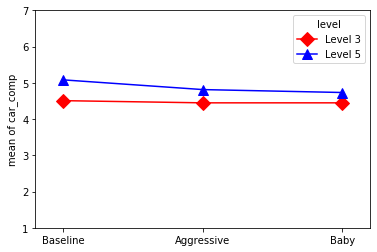

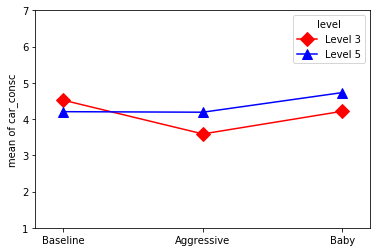

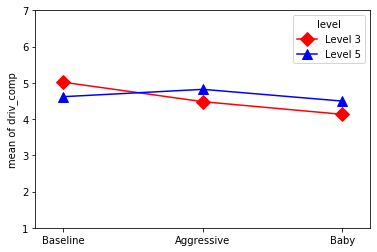

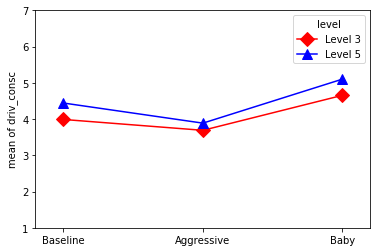

In [139]:
for attribution in ['car_comp', 'car_consc', 'driv_comp', 'driv_consc']:

    fig = interaction_plot(x=data['design'].cat.codes, trace=data['level'], response=data[attribution], 
                       colors=['red', 'blue'], markers=['D', '^'], ms=10)

    plt.xticks([0,1,2], labels=['Baseline', 'Aggressive', 'Baby'])
    plt.ylim(1,7)
    plt.show()

## Correlates between mediators and responsibility ascription


In [141]:
data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer', 'car_comp', 'car_consc', 'driv_comp', 'driv_consc']].corr()

,Resp_Bic,Resp_Car,Resp_Driver,Resp_Producer,car_comp,car_consc,driv_comp,driv_consc
Resp_Bic,1.000000,-0.222320,-0.175123,-0.278358,0.046022,0.029004,0.093670,-0.013822
Resp_Car,-0.222320,1.000000,-0.139129,0.466799,0.013106,0.053559,0.041040,0.022856
Resp_Driver,-0.175123,-0.139129,1.000000,-0.126747,-0.246109,-0.093828,0.047234,-0.020050
Resp_Producer,-0.278358,0.466799,-0.126747,1.000000,0.117117,0.054641,-0.079727,0.010530
car_comp,0.046022,0.013106,-0.246109,0.117117,1.000000,0.456151,0.256140,0.137609
car_consc,0.029004,0.053559,-0.093828,0.054641,0.456151,1.000000,0.290906,0.461652
driv_comp,0.093670,0.041040,0.047234,-0.079727,0.256140,0.290906,1.000000,0.276235
driv_consc,-0.013822,0.022856,-0.020050,0.010530,0.137609,0.461652,0.276235,1.000000


In [142]:
# Function to calculate p-values

from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [143]:
rho = data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer', 'car_comp', 'car_consc', 'driv_comp', 'driv_consc']].corr()
rho = rho.round(2)
pval = calculate_pvalues(data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer', 'car_comp', 'car_consc', 'driv_comp', 'driv_consc']]) 
# create three masks
r1 = rho.applymap(lambda x: '{}*'.format(x))
r2 = rho.applymap(lambda x: '{}**'.format(x))
r3 = rho.applymap(lambda x: '{}***'.format(x))
# apply them where appropriate
rho = rho.mask(pval<=0.1,r1)
rho = rho.mask(pval<=0.05,r2)
rho = rho.mask(pval<=0.01,r3)
rho

,Resp_Bic,Resp_Car,Resp_Driver,Resp_Producer,car_comp,car_consc,driv_comp,driv_consc
Resp_Bic,1.0***,-0.22***,-0.18**,-0.28***,0.05,0.03,0.09,-0.01
Resp_Car,-0.22***,1.0***,-0.14*,0.47***,0.01,0.05,0.04,0.02
Resp_Driver,-0.18**,-0.14*,1.0***,-0.13,-0.25***,-0.09,0.05,-0.02
Resp_Producer,-0.28***,0.47***,-0.13,1.0***,0.12,0.05,-0.08,0.01
car_comp,0.05,0.01,-0.25***,0.12,1.0***,0.46***,0.26***,0.14*
car_consc,0.03,0.05,-0.09,0.05,0.46***,1.0***,0.29***,0.46***
driv_comp,0.09,0.04,0.05,-0.08,0.26***,0.29***,1.0***,0.28***
driv_consc,-0.01,0.02,-0.02,0.01,0.14*,0.46***,0.28***,1.0***


In [ ]:
# Only singifcant relationship (negative) between car competence and responsibility of driver